# Solving ticket pricing problem using GA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return -20*x*x+6200*x-350000

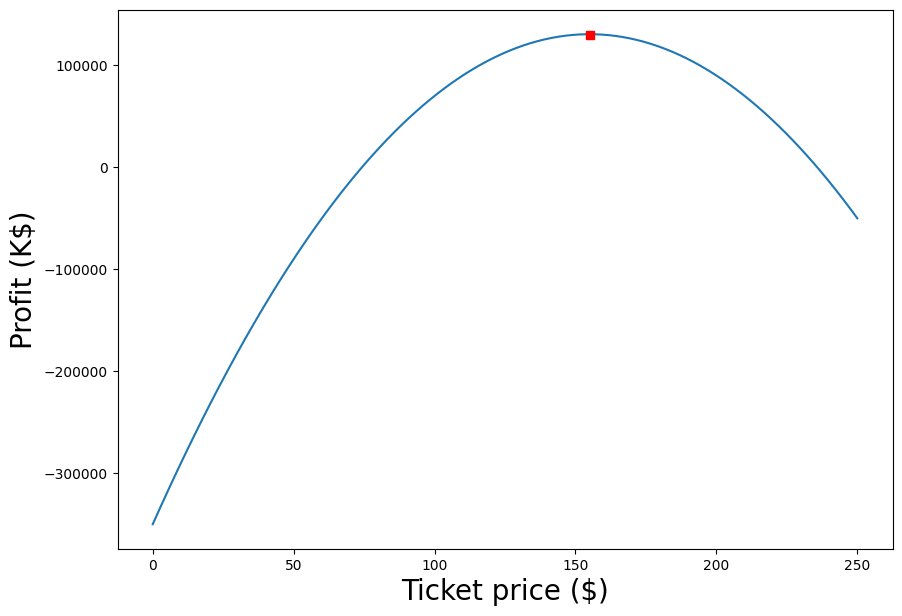

In [3]:
# plot proft-ticket price curve
plt.figure(figsize=(10, 7))
x = np.linspace(0, 250, 100)
plt.plot(x, f(x))

# Plot the optima
plt.plot(155, 130000, "s", color="r")

# Add title and axis names
plt.xlabel("Ticket price ($)", fontsize=20)
plt.ylabel("Profit (K$)", fontsize=20)
plt.show()
# plt.savefig("CH01_F05_Pricing.png", format="png", dpi=300)

In [4]:
import random

# Define the genetic algorithm parameters
population_size = 50
chromosome_length = 8
mutation_rate = 0.1
crossover_rate = 0.7
generations = 3000
x_min = 75 # minimum ticket price
x_max = 235 # maximum ticket price

In [5]:
# Initialize the population
population = []
for i in range(population_size):
    chromosome = []
    for j in range(chromosome_length):
        chromosome.append(random.randint(0, 1))
    population.append(chromosome)

In [6]:
# Run the genetic algorithm
for generation in range(generations):
    # Evaluate the fitness of each individual in the population
    fitness_scores = []
    for chromosome in population:
        x = x_min + (x_max - x_min) * int(''.join(map(str, chromosome)), 2) / (2 ** chromosome_length - 1)
        if x < x_min or x > x_max:
            fitness_scores.append(-float('inf'))
        else:
            fitness_scores.append(f(x))
    
    # Select parents for reproduction using roulette wheel selection
    total_fitness = sum(fitness_scores)
    probabilities = [fitness_score / total_fitness for fitness_score in fitness_scores]
    selected_parents = []
    for i in range(population_size):
        spin = random.uniform(0, 1) # generate a random number between 0 and 1
        spin_position = 0
        for j in range(population_size):
            spin_position += probabilities[j] # calculate cummulate probabilities
            if spin_position > spin:
                selected_parents.append(population[j])
                break
    
    # Reproduce using single-point crossover
    offspring = []
    for i in range(0, population_size, 2):
        parent1 = selected_parents[i]
        parent2 = selected_parents[i+1]
        crossover_point = random.randint(1, chromosome_length - 1)
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]
        offspring.append(child1)
        offspring.append(child2)
    
    # Mutate the offspring
    for chromosome in offspring:
        for i in range(chromosome_length):
            if random.uniform(0, 1) < mutation_rate:
                chromosome[i] = int(not chromosome[i])
    
    # Replace the old population with the new offspring
    population = offspring

In [7]:
# Print the best individual found
best_individual = max(population, key=lambda chromosome: x_min + (x_max - x_min) * int(''.join(map(str, chromosome)), 2) / (2 ** chromosome_length - 1))
best_x = x_min + (x_max - x_min) * int(''.join(map(str, best_individual)), 2) / (2 ** chromosome_length - 1)
best_fitness = f(best_x)

print(f"Best individual: {best_individual}")
print("Optimal Ticket Price ($): %.2f" % best_x)
print("Profit f(x) in K$: %.2f" % best_fitness)

Best individual: [1, 1, 1, 1, 0, 0, 1, 0]
Optimal Ticket Price ($): 226.84
Profit f(x) in K$: 27271.27
